**Parte 5. Clasificador GBN**

Entradas (features): Thumb, Index, Middle, Ring, Pinky

Salida (target): Hand (Left, Right)

Dataset:  Glove_train.csv

**Contenido**

*   Importacion de librerias
*   Creacion de Dataframe: identificacion de etiquetas, balance de datos y  busqueda de valores null
*   Conversion de valores categoricos a numericos (mapeo)
*   Normalizacion de caracteristicas
*   Implementacion del modelo: entrenamiento y validacion
*   Resultados
*   Conclusiones
*   Anexos

**Importacion de librerias**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Creacion de Dataframe a partir de Glove_train.csv**

A partir del dataset en formato CSV se dispone de 5 features y 3 targets, por lo que es necesario definir un problema de clasificacion para cada uno de las salidas: Gesture, Hand y Subject.

In [ ]:
data = '/content/Glove_train.csv'
df2 = pd.read_csv(data)
df2 = df2.drop(['id','Gesture', 'Subject'], axis=1)
df2.head()

Thumb     Index    Middle      Ring     Pinky Hand
0  0.898072  0.043478  0.228420  0.968593  0.910390    L
1  0.647410  0.967136  0.971925  0.652116  0.905983    L
2  0.087201  0.000000  0.087087  0.052713  0.102964    L
3  0.672886  0.933579  0.970787  0.939791  0.997195    R
4  0.089119  0.135849  0.096421  0.087786  0.072082    R

Identificacion de etiquetas y busqueda de valores null dentro del Dataframe: (https://pandas.pydata.org/docs/reference/api/pandas.unique.html, https://sparkbyexamples.com/pandas/pandas-check-if-any-value-is-nan-in-a-dataframe/)

In [ ]:
df2['Hand'].unique()

array(['L', 'R'], dtype=object)

In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2['Hand'].value_counts()

L    25236
R    25164
Name: Hand, dtype: int64

Conversion de variables categoricas a variables numericas para facilitar la implementacion del algoritmo de clasificacion:

In [ ]:
df2['Hand'] = df2['Hand'].map({'L' :0, 'R' :1}).astype(int) #mapping numbers
df2.head()

Thumb     Index    Middle      Ring     Pinky  Hand
0  0.898072  0.043478  0.228420  0.968593  0.910390     0
1  0.647410  0.967136  0.971925  0.652116  0.905983     0
2  0.087201  0.000000  0.087087  0.052713  0.102964     0
3  0.672886  0.933579  0.970787  0.939791  0.997195     1
4  0.089119  0.135849  0.096421  0.087786  0.072082     1

**Normalizacion de caracteristicas (features)**

Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
x_data = df2.drop(['Hand'],axis=1)
y_data = df2['Hand']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
data.head()

Thumb     Index    Middle      Ring     Pinky
0  0.898072  0.043478  0.228420  0.968593  0.910390
1  0.647410  0.967136  0.971925  0.652116  0.905983
2  0.087201  0.000000  0.087087  0.052713  0.102964
3  0.672886  0.933579  0.970787  0.939791  0.997195
4  0.089119  0.135849  0.096421  0.087786  0.072082

**Implementacion clasificador por medio de algoritmo Bayes Naive Gausiano: entrenamiento y validacion**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.3, random_state = 1)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

**Resultados**

classification_report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[5047 2558]
 [3021 4494]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      7605
           1       0.64      0.60      0.62      7515

    accuracy                           0.63     15120
   macro avg       0.63      0.63      0.63     15120
weighted avg       0.63      0.63      0.63     15120

Accuracy: 0.6310185185185185


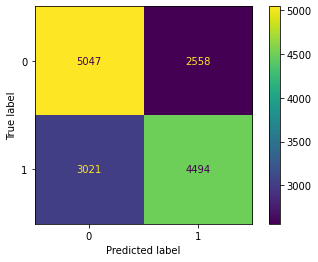

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.show()

**Conclusiones**

**Anexos**

<AxesSubplot:xlabel='Thumb', ylabel='Index'>

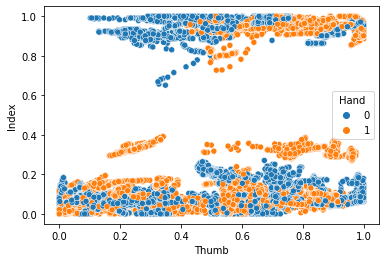

In [ ]:
sns.scatterplot(x=df2['Thumb'],y=df2['Index'], hue=df2['Hand'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
# Datos
D = '/content/Glove_train.csv'
DF = pd.read_csv(D)
DF = DF.drop(['id','Gesture','Subject'], axis=1)

# Fin datos
DF['Hand'] = DF['Hand'].map({'L' :0, 'R' :1}).astype(int) #mapping numbers

X = DF.drop(['Hand'],axis=1)
Y = DF['Hand']

DF.head()

Thumb     Index    Middle      Ring     Pinky  Hand
0  0.898072  0.043478  0.228420  0.968593  0.910390     0
1  0.647410  0.967136  0.971925  0.652116  0.905983     0
2  0.087201  0.000000  0.087087  0.052713  0.102964     0
3  0.672886  0.933579  0.970787  0.939791  0.997195     1
4  0.089119  0.135849  0.096421  0.087786  0.072082     1

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.63378685 0.6207483  0.62358277 0.62528345 0.61026077 0.64370748
 0.62556689 0.61196145 0.62556689 0.63492063]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6255
